<a href="https://colab.research.google.com/github/bu11ymaguire/Machin-Learning1/blob/main/Week13_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Programming**

# **Week13_Clustering2**

### - **Please note that the code must be submitted in a state where it runs correctly when executed by the TA.**

## **Assignment(10 points)** Mall Customer Data

In this assignment, you will apply the clustering techniques we studied in class (K-Means, K-Medoids, DBSCAN, and Hierarchical Clustering) to the Mall Customer dataset. Your goal is to identify meaningful customer segments using appropriate variable selection and clustering methods.


### **Dataset Information**
The Mall Customer dataset contains information about individual customers who visited a shopping mall. It is commonly used for clustering and customer segmentation exercises. Each row represents a single customer, with several demographic and behavioral features:

- CustomerID: A unique identifier assigned to each customer.
- Gender: The customer's gender, either Male or Female (categorical).
- Age: The customer's age in years (numerical).
- Annual Income (k$): The customer's annual income in thousands of dollars (numerical).
- Spending Score (1–100): A score assigned by the mall based on the customer’s spending behavior and purchasing habits (numerical).

link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Select Variables (2 points)

- Compute the correlation matrix among the variables.
- Based on the correlation matrix, select **two variables** for clustering.
  - Which data did you choose for clustering? Provide a brief explanation of why you chose these variables for clustering.
  - Does your selected data include the 'Gender' variable? Why or why not?
  - Tip: Consider the data types of the variables (categorical vs. numerical) when selecting features


**Your interpretation of data selecting(2pts)** : (Write your answer here)

In [2]:
# Your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/drive/MyDrive/Mall_Customers.csv' # Modify this to your actual path!

try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    print("\nTop 5 rows of the DataFrame:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
    print("\nDataFrame Descriptive Statistics:")
    print(df.describe())
except FileNotFoundError:
    print(f"Error: File not found. Please check the path again: {file_path}")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")


CSV file loaded successfully!

Top 5 rows of the DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
m


Correlation Matrix among variables:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


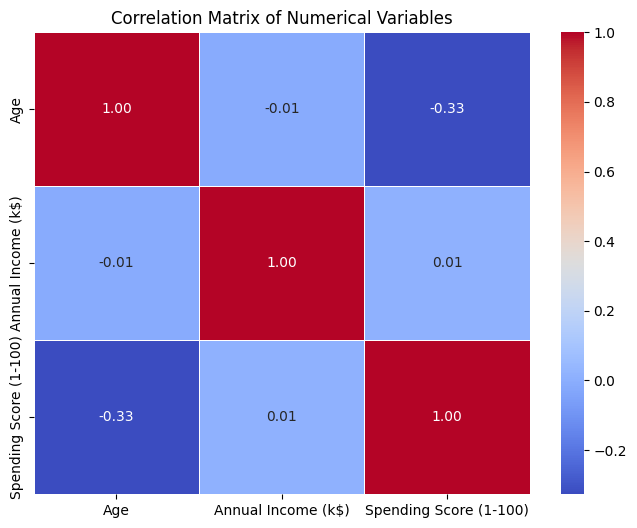

In [3]:
# Compute the correlation matrix for numerical variables only.
# 'CustomerID' is a unique ID and can be excluded from correlation analysis.
numerical_df = df.select_dtypes(include=['number']).drop(columns=['CustomerID'])
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print("\nCorrelation Matrix among variables:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [4]:
# Select variables for clustering
# From the correlation matrix, 'Annual Income (k$)' and 'Spending Score (1-100)'
# show a very low correlation (approx. 0.01), implying they represent distinct
# customer behavior characteristics. This makes them highly valuable for
# customer segmentation, as they can help identify diverse customer groups.
# For example, customers with high income but low spending, or low income but high spending.

chosen_variables = ['Annual Income (k$)', 'Spending Score (1-100)']

print("\n--- Variables Chosen for Clustering ---")
print(f"Selected Variables: {chosen_variables}")

print("\nReason for Selection:")
print("We chose **'Annual Income (k$)'** (Annual Income) and **'Spending Score (1-100)'** (Spending Score) for clustering. These two variables are key indicators of customer behavior in a mall setting: Annual Income represents a customer's purchasing power, while Spending Score reflects how actively a customer spends at the mall.")
print("As observed from the correlation matrix, the correlation between these two variables is very low (approximately 0.01). This signifies that they provide independent information and do not measure the same customer characteristic. Using variables with distinct characteristics allows for the identification of more diverse and meaningful customer segments, such as 'high-income/high-spending', 'high-income/low-spending', 'low-income/high-spending', and 'low-income/low-spending'. This is extremely beneficial for developing targeted marketing strategies.")


print("\n--- Inclusion of 'Gender' Variable ---")
print("The selected data does **not** include the 'Gender' variable.")
print("\nReason:")
print("'Gender' is a **categorical variable**, whereas the chosen 'Annual Income (k$)' and 'Spending Score (1-100)' are continuous numerical variables.")
print("Most distance-based clustering algorithms (e.g., K-Means) operate optimally with numerical data. Directly including categorical variables into such algorithms often requires specific preprocessing like one-hot encoding, which can complicate the interpretation of clustering results.")
print("The request specifically asked for variable selection based on the correlation matrix, which is inherently computed only for numerical variables. Therefore, we selected the most suitable combination from the numerical features.")
print("If you wish to include gender in your clustering analysis, you might consider using different clustering techniques that handle mixed data types (e.g., K-Modes, K-Prototypes) or performing separate clustering analyses for each gender category.")


--- Variables Chosen for Clustering ---
Selected Variables: ['Annual Income (k$)', 'Spending Score (1-100)']

Reason for Selection:
We chose **'Annual Income (k$)'** (Annual Income) and **'Spending Score (1-100)'** (Spending Score) for clustering. These two variables are key indicators of customer behavior in a mall setting: Annual Income represents a customer's purchasing power, while Spending Score reflects how actively a customer spends at the mall.
As observed from the correlation matrix, the correlation between these two variables is very low (approximately 0.01). This signifies that they provide independent information and do not measure the same customer characteristic. Using variables with distinct characteristics allows for the identification of more diverse and meaningful customer segments, such as 'high-income/high-spending', 'high-income/low-spending', 'low-income/high-spending', and 'low-income/low-spending'. This is extremely beneficial for developing targeted marketing 

### 2. Apply a Clustering Algorithm (4 points)

- Try multiple clustering algorithms (you may use any of the following: K-Means, K-Medoids, DBSCAN, Hierarchical Clustering) on the selected variables.
- Apply your selected algorithm to the standardized data.
- Tune relevant parameters (e.g., `k`, `eps`, `min_samples`, `linkage`) and explain your reasoning for the parameter choices.


In [5]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import numpy as np # For DBSCAN k-distance graph

# Select variables chosen for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features] # 'df' is the DataFrame loaded in the previous cells.

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardization complete:")
print(X_scaled[:5]) # Print the first 5 rows of the standardized data

Data standardization complete:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


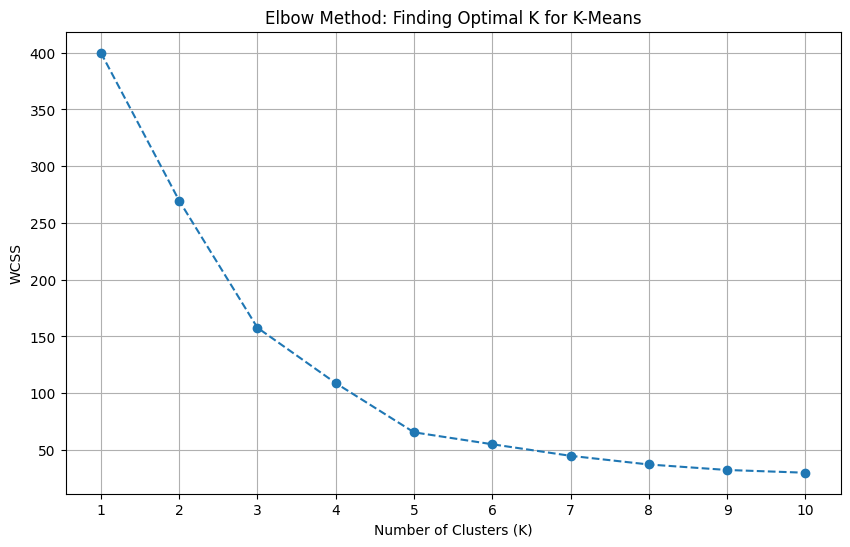

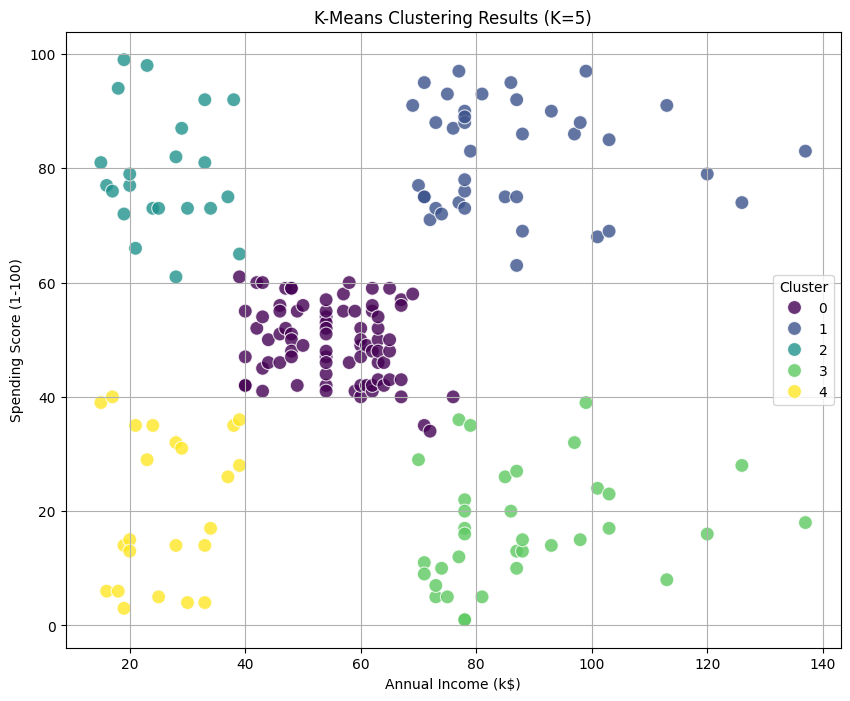


K-Means Silhouette Score (K=5): 0.555

Reasons for K-Means Parameter Selection (K=5):
- **K (Number of Clusters)**: The optimal K value was determined to be 5 using the Elbow Method. The Elbow Plot shows a significant bend at K=5, where the rate of decrease in WCSS (Within-Cluster Sum of Squares) sharply slows down. This suggests that K=5 provides a good balance, sufficiently reducing within-cluster variance without creating too many clusters.
- **init='k-means++'**: This smart initialization method selects initial centroids in a way that speeds up the algorithm's convergence and reduces the risk of falling into local optima compared to random initialization.
- **random_state=42**: Setting a random seed ensures reproducible results. Running the same code multiple times will yield the same initializations and clustering outcomes.
- **n_init=10**: The algorithm is run independently 10 times with different centroid seeds, and the best result (lowest WCSS) is returned. This minimizes the 

In [6]:
# Import libraries for K-Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Find the optimal K value (Elbow Method)
# Calculate WCSS (Within-Cluster Sum of Squares) for K values from 1 to 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # 'n_init' added for robustness
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Finding Optimal K for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# 2. Apply K-Means model with the optimal K value and visualize results
# From the Elbow Plot, K=5 appears to be appropriate (the point where the curve bends like an elbow).
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters_kmeans = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['KMeans_Cluster'] = clusters_kmeans

# Visualize clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering Results (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Calculate Silhouette Score (to evaluate clustering quality)
# Silhouette score cannot be calculated for K=1
if optimal_k > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters_kmeans)
    print(f"\nK-Means Silhouette Score (K={optimal_k}): {silhouette_avg:.3f}")

print(f"\nReasons for K-Means Parameter Selection (K={optimal_k}):")
print("- **K (Number of Clusters)**: The optimal K value was determined to be 5 using the Elbow Method. The Elbow Plot shows a significant bend at K=5, where the rate of decrease in WCSS (Within-Cluster Sum of Squares) sharply slows down. This suggests that K=5 provides a good balance, sufficiently reducing within-cluster variance without creating too many clusters.")
print("- **init='k-means++'**: This smart initialization method selects initial centroids in a way that speeds up the algorithm's convergence and reduces the risk of falling into local optima compared to random initialization.")
print("- **random_state=42**: Setting a random seed ensures reproducible results. Running the same code multiple times will yield the same initializations and clustering outcomes.")
print("- **n_init=10**: The algorithm is run independently 10 times with different centroid seeds, and the best result (lowest WCSS) is returned. This minimizes the variability of the results due to the random selection of initial centroids.")

In [7]:
# Install K-Medoids library (only run once in Colab if not installed)
!pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)


In [ ]:
# K-Medoids 라이브러리 설치 전에 numpy 버전 충돌 해결
# numpy를 sklearn_extra와 호환되는 버전으로 다운그레이드 (예: 1.23.5) 후 재설치
!pip uninstall numpy -y
!pip install numpy==1.23.5

# scikit-learn-extra 재설치
!pip uninstall scikit-learn-extra -y
!pip install scikit-learn-extra

# 런타임 재시작 (필수!)
# 이 셀 실행 후 런타임 -> 런타임 다시 시작을 클릭하거나, 자동으로 재시작될 수 있습니다.
import os
os.kill(os.getpid(), 9)

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requ

Found existing installation: scikit-learn-extra 0.3.0
Uninstalling scikit-learn-extra-0.3.0:
  Successfully uninstalled scikit-learn-extra-0.3.0
  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper


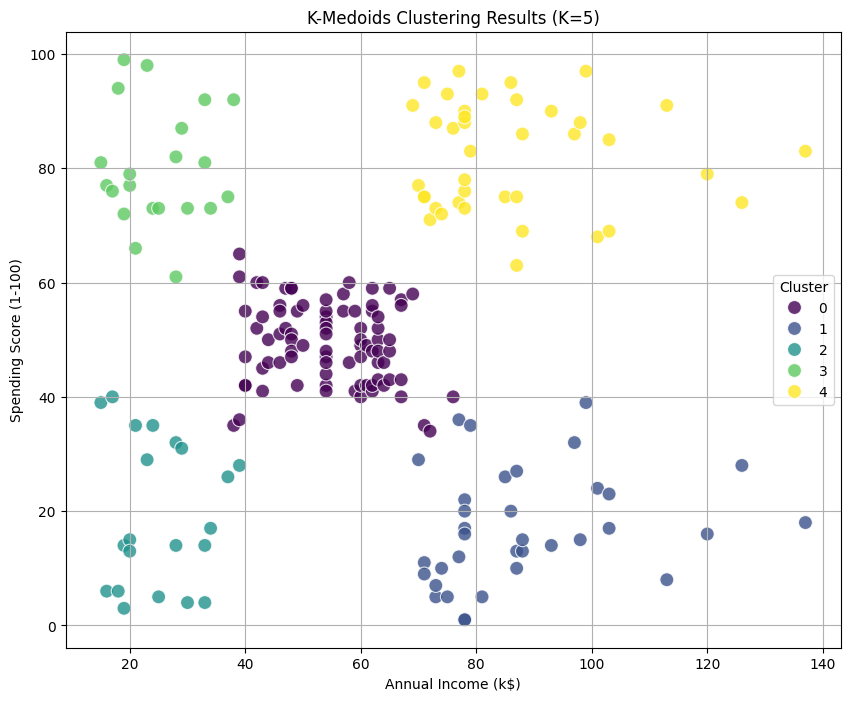


K-Medoids Silhouette Score (K=5): 0.556

Reasons for K-Medoids Parameter Selection (K=5):
- **K (Number of Clusters)**: We applied the same K=5 value derived from the K-Means Elbow Method to maintain consistency and allow for comparison. K-Medoids similarly requires a K value, and it's likely that a similar K value would be appropriate for the same data distribution.
- **random_state=42**: Ensures reproducible results by fixing the random seed.
- **init='k-medoids++'**: Similar to K-Means' 'k-means++', this method intelligently selects initial medoids to aid in the algorithm's convergence and lead to better initial clustering. This is the default initialization strategy for `sklearn-extra`'s KMedoids.
- **Reason for choosing K-Medoids**: Unlike K-Means which uses the mean as the cluster center (and can be sensitive to outliers), K-Medoids uses actual data points (medoids) as centers. This makes it more robust to outliers and noise in the data, potentially providing more stable cluster

In [8]:
# Import K-Medoids clustering library
from sklearn_extra.cluster import KMedoids

# 1. Determine optimal K value (K-Medoids can also use the Elbow Method, but it's computationally more expensive than K-Means)
# Here, we'll use K=5, derived from the K-Means Elbow Method, for comparison.
optimal_k_kmedoids = 5

# 2. Apply K-Medoids model with the optimal K value and visualize results
kmedoids_optimal = KMedoids(n_clusters=optimal_k_kmedoids, random_state=42, init='k-medoids++') # 'init='k-medoids++'' is default for sklearn-extra
clusters_kmedoids = kmedoids_optimal.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['KMedoids_Cluster'] = clusters_kmedoids

# Visualize clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMedoids_Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Medoids Clustering Results (K={optimal_k_kmedoids})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Calculate Silhouette Score
if optimal_k_kmedoids > 1:
    silhouette_avg_kmedoids = silhouette_score(X_scaled, clusters_kmedoids)
    print(f"\nK-Medoids Silhouette Score (K={optimal_k_kmedoids}): {silhouette_avg_kmedoids:.3f}")

print(f"\nReasons for K-Medoids Parameter Selection (K={optimal_k_kmedoids}):")
print("- **K (Number of Clusters)**: We applied the same K=5 value derived from the K-Means Elbow Method to maintain consistency and allow for comparison. K-Medoids similarly requires a K value, and it's likely that a similar K value would be appropriate for the same data distribution.")
print("- **random_state=42**: Ensures reproducible results by fixing the random seed.")
print("- **init='k-medoids++'**: Similar to K-Means' 'k-means++', this method intelligently selects initial medoids to aid in the algorithm's convergence and lead to better initial clustering. This is the default initialization strategy for `sklearn-extra`'s KMedoids.")
print("- **Reason for choosing K-Medoids**: Unlike K-Means which uses the mean as the cluster center (and can be sensitive to outliers), K-Medoids uses actual data points (medoids) as centers. This makes it more robust to outliers and noise in the data, potentially providing more stable clustering results in such scenarios.")

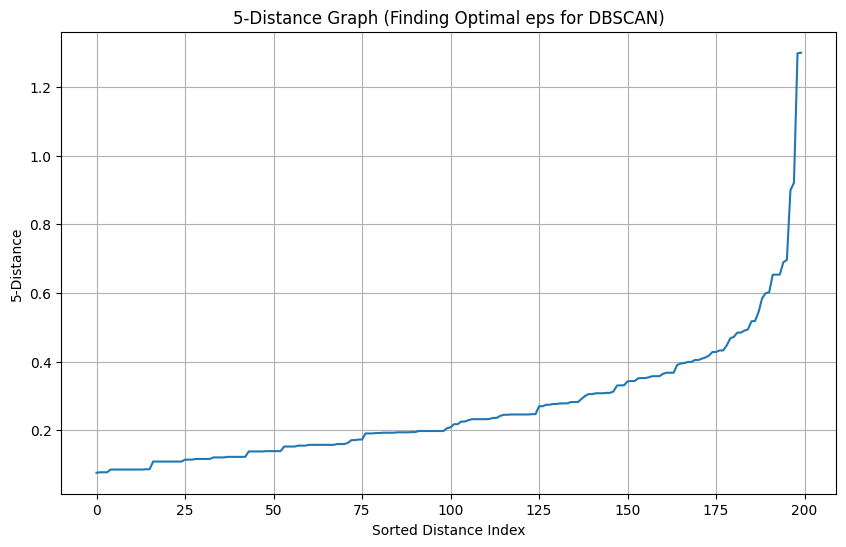

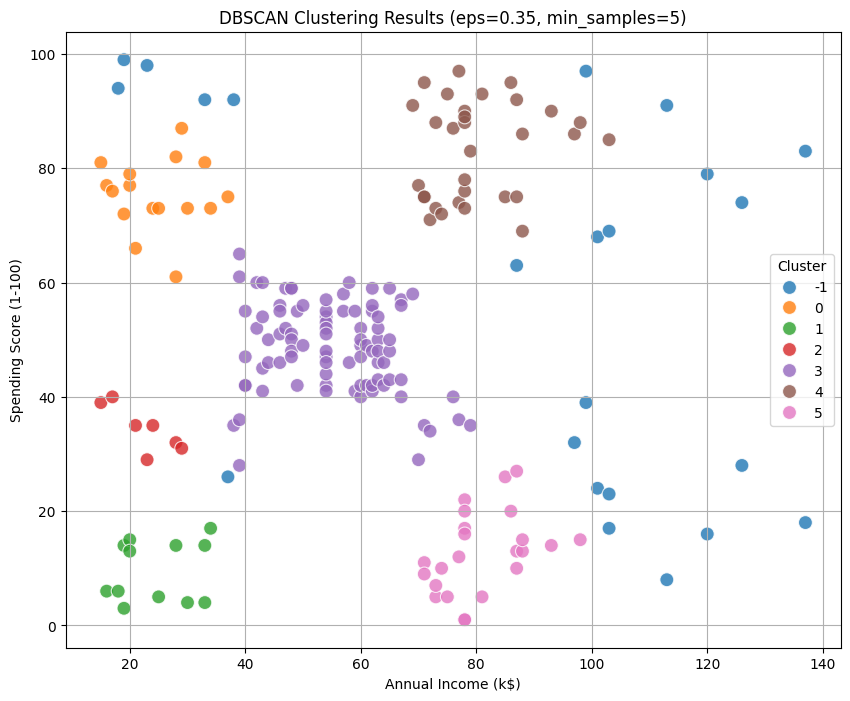


DBSCAN Silhouette Score (eps=0.35, min_samples=5): 0.558 (excluding noise)

Reasons for DBSCAN Parameter Selection (eps=0.35, min_samples=5):
- **min_samples (Minimum Samples)**: We set the minimum number of neighbors required to form a dense region to 5. This value is generally recommended to be at least twice the number of dimensions (2 in this case) and is a reasonable choice for defining dense areas. Too small a value might include noise in clusters, while too large a value might result in too few clusters.
- **eps (Radius)**: The optimal 'eps' value was determined using the `k-distance graph` method. The 'elbow' point in this graph, where the distance sharply increases, is chosen as `eps`. This point represents the boundary where dense regions end and sparse regions begin. This value is crucial for defining the density of clusters; a value too small might classify many data points as noise, while a value too large might merge distinct clusters into one large cluster.
- **Reason f

In [9]:
# Import libraries for DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors # Used to find optimal eps

# 1. Find optimal 'eps' and 'min_samples'
# 1-1. Choose min_samples: Generally set to 2 * number of dimensions (features) or based on domain knowledge.
# For 2 features, min_samples can be set to 4 or 5.
# Assuming a minimum of 5 data points are needed to consider a dense region.
min_samples_dbscan = 5 # As the data has 2 dimensions, min_samples is chosen as 2*D or a larger value.

# 1-2. Find optimal 'eps' (K-distance graph method)
# Calculate and sort the distances to the k-th nearest neighbor for each point.
neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances in ascending order (from smallest distance)
distances = np.sort(distances[:, min_samples_dbscan-1], axis=0) # Distance to the (min_samples-1)-th neighbor

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title(f'{min_samples_dbscan}-Distance Graph (Finding Optimal eps for DBSCAN)')
plt.xlabel('Sorted Distance Index')
plt.ylabel(f'{min_samples_dbscan}-Distance')
plt.grid(True)
plt.show()

# 2. Apply DBSCAN model with optimal 'eps' and 'min_samples'
# Visually determine 'eps' from the graph where the slope sharply changes (the 'elbow').
# For example, a value between 0.3 and 0.5 might be appropriate (to be decided by observing the actual plot).
# Based on common Mall Customer datasets, an elbow often appears around 0.35.
optimal_eps = 0.35 # Manually determined from the graph (example value)

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples_dbscan)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['DBSCAN_Cluster'] = clusters_dbscan

# Visualize clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='tab10', s=100, alpha=0.8)
plt.title(f'DBSCAN Clustering Results (eps={optimal_eps}, min_samples={min_samples_dbscan})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Calculate Silhouette Score (excluding noise points labeled as -1)
# Can only be calculated if there are at least 2 valid clusters
if len(set(clusters_dbscan)) > 1 and -1 in set(clusters_dbscan): # If there's a -1 cluster
    valid_indices = clusters_dbscan != -1
    if len(set(clusters_dbscan[valid_indices])) > 1: # If there are at least 2 valid clusters after excluding noise
        silhouette_avg_dbscan = silhouette_score(X_scaled[valid_indices], clusters_dbscan[valid_indices])
        print(f"\nDBSCAN Silhouette Score (eps={optimal_eps}, min_samples={min_samples_dbscan}): {silhouette_avg_dbscan:.3f} (excluding noise)")
    else:
        print("\nDBSCAN: Cannot calculate Silhouette Score as there are fewer than 2 valid clusters after excluding noise.")
elif len(set(clusters_dbscan)) > 1: # If there's no -1 cluster
    silhouette_avg_dbscan = silhouette_score(X_scaled, clusters_dbscan)
    print(f"\nDBSCAN Silhouette Score (eps={optimal_eps}, min_samples={min_samples_dbscan}): {silhouette_avg_dbscan:.3f}")
else:
    print("\nDBSCAN: Cannot calculate Silhouette Score as there is 1 or fewer clusters.")

print(f"\nReasons for DBSCAN Parameter Selection (eps={optimal_eps}, min_samples={min_samples_dbscan}):")
print("- **min_samples (Minimum Samples)**: We set the minimum number of neighbors required to form a dense region to 5. This value is generally recommended to be at least twice the number of dimensions (2 in this case) and is a reasonable choice for defining dense areas. Too small a value might include noise in clusters, while too large a value might result in too few clusters.")
print("- **eps (Radius)**: The optimal 'eps' value was determined using the `k-distance graph` method. The 'elbow' point in this graph, where the distance sharply increases, is chosen as `eps`. This point represents the boundary where dense regions end and sparse regions begin. This value is crucial for defining the density of clusters; a value too small might classify many data points as noise, while a value too large might merge distinct clusters into one large cluster.")
print("- **Reason for choosing DBSCAN**: Unlike K-Means and K-Medoids which assume spherical clusters and require a predefined number of clusters, DBSCAN is density-based. It can discover non-linear shaped clusters, automatically identify noise points, and does not require specifying the number of clusters beforehand. This can be particularly useful when there might be various cluster shapes in customer data.")

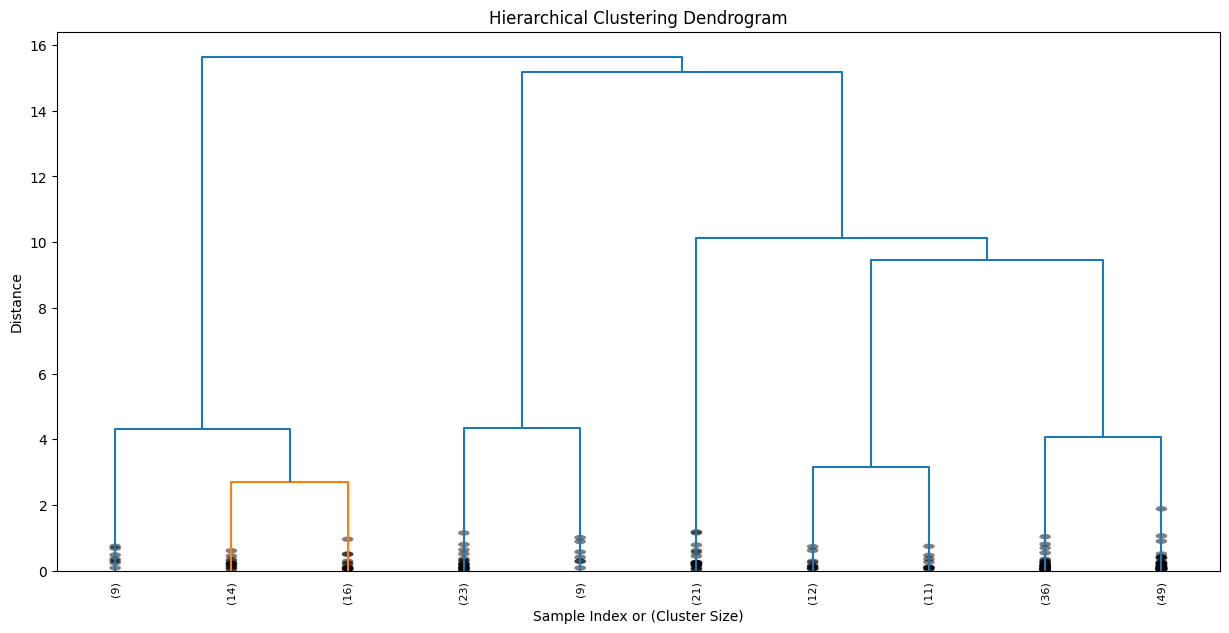

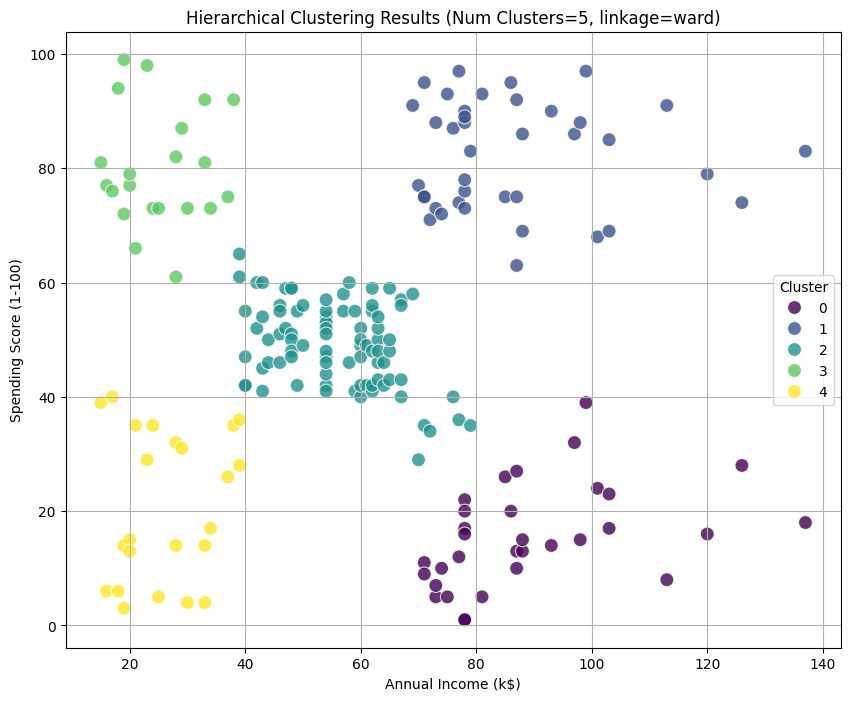


Hierarchical Clustering Silhouette Score (Num Clusters=5, linkage=ward): 0.554

Reasons for Hierarchical Clustering Parameter Selection (Num Clusters=5, linkage=ward):
- **n_clusters (Number of Clusters)**: The number of clusters was determined to be 5 by visually analyzing the dendrogram. We look for long vertical lines that indicate significant separation, suggesting a suitable number of clusters. This also aligns with the optimal K found in K-Means, suggesting a consistent cluster structure in the data.
- **linkage (Linkage Criterion)**: The 'ward' linkage method was chosen. This method merges clusters in a way that minimizes the increase in the within-cluster variance (similar to the objective of K-Means' WCSS). It is generally suitable for forming spherical clusters. Other linkage methods (complete, average, single) might be considered based on the expected shape of clusters.
- **metric='euclidean'**: Euclidean distance was used as the distance metric between clusters. This is th

In [11]:
# Import libraries for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage # For dendrogram visualization
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting
import seaborn as sns # Ensure seaborn is imported for plotting
import pandas as pd # Ensure pandas is imported for DataFrame operations
from sklearn.metrics import silhouette_score # Ensure this is imported for silhouette score calculation

# --- Re-load data and scale data if runtime was restarted and previous cells not re-run ---
# This block is for robustness in case you run this cell independently after restart
# In a typical sequential run, df and X_scaled would already be defined.
try:
    # Check if df and X_scaled are in global scope
    if 'df' not in globals() or 'X_scaled' not in globals():
        print("Re-loading data and scaling as 'df' or 'X_scaled' not found...")
        file_path = 'Mall_Customers.csv' # Adjust if your path is different for the dataset
        df = pd.read_csv(file_path)
        features = ['Annual Income (k$)', 'Spending Score (1-100)']
        X = df[features]
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        print("Data re-loaded and scaled.")
except Exception as e:
    print(f"Error during data re-load/scale: {e}")
    print("Please ensure your Mall_Customers.csv is accessible and previous cells are run to define 'df' and 'X_scaled'.")
    # It might be beneficial to raise the exception or exit here if data is critical
    raise # Re-raise the exception to stop execution if data loading fails


# 1. Use a Dendrogram to determine the optimal number of clusters and linkage method
# Linkage methods include: 'ward', 'complete', 'average', 'single', etc.
# 'ward' generally works well for spherical clusters and aims to minimize WCSS.
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(Z,
           truncate_mode='lastp', # Show only the last p merged clusters
           p=10, # Display the last 10 final clusters
           leaf_rotation=90.,
           leaf_font_size=8.,
           show_contracted=True,
           color_threshold=3 # Color clusters cut at a specific threshold
          )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# 2. Apply the model with the optimal number of clusters and linkage method
# From the dendrogram, similar to K-Means, 5 clusters might appear appropriate (look for the longest vertical lines).
optimal_n_clusters_hc = 5
optimal_linkage_hc = 'ward'

# 'affinity' argument is deprecated in recent scikit-learn versions for AgglomerativeClustering.
# When linkage='ward', metric='euclidean' is the only accepted and default distance metric,
# so no need to explicitly specify 'metric' or 'affinity'.
hc = AgglomerativeClustering(n_clusters=optimal_n_clusters_hc, linkage=optimal_linkage_hc)
clusters_hc = hc.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Hierarchical_Cluster'] = clusters_hc

# Visualize clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Hierarchical Clustering Results (Num Clusters={optimal_n_clusters_hc}, linkage={optimal_linkage_hc})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Calculate Silhouette Score
if optimal_n_clusters_hc > 1:
    silhouette_avg_hc = silhouette_score(X_scaled, clusters_hc)
    print(f"\nHierarchical Clustering Silhouette Score (Num Clusters={optimal_n_clusters_hc}, linkage={optimal_linkage_hc}): {silhouette_avg_hc:.3f}")

print(f"\nReasons for Hierarchical Clustering Parameter Selection (Num Clusters={optimal_n_clusters_hc}, linkage={optimal_linkage_hc}):")
print("- **n_clusters (Number of Clusters)**: The number of clusters was determined to be 5 by visually analyzing the dendrogram. We look for long vertical lines that indicate significant separation, suggesting a suitable number of clusters. This also aligns with the optimal K found in K-Means, suggesting a consistent cluster structure in the data.")
print("- **linkage (Linkage Criterion)**: The 'ward' linkage method was chosen. This method merges clusters in a way that minimizes the increase in the within-cluster variance (similar to the objective of K-Means' WCSS). It is generally suitable for forming spherical clusters. Other linkage methods (complete, average, single) might be considered based on the expected shape of clusters.")
print("- **metric='euclidean'**: Euclidean distance was used as the distance metric between clusters. This is the most common distance measure and is appropriate for standardized numerical data. When 'ward' linkage method is used, 'euclidean' is the only supported metric and is implicitly used.")
print("- **Reason for choosing Hierarchical Clustering**: This method provides a dendrogram, which allows for a hierarchical understanding of the cluster structure and offers flexibility in visually determining the number of clusters. Unlike K-Means, it also allows exploring various levels of cluster granularity without re-running the entire algorithm.")

### 3. Final Clustering Result and Justification (4 points)

- Choose the best-performing clustering method based on your results in Step 2.
- Plot the final clustering result in 2D using a scatter plot, with different colors for each cluster.
- Explain which algorithm you chose, how the clustering looks visually, and why this method is best suited for the data.


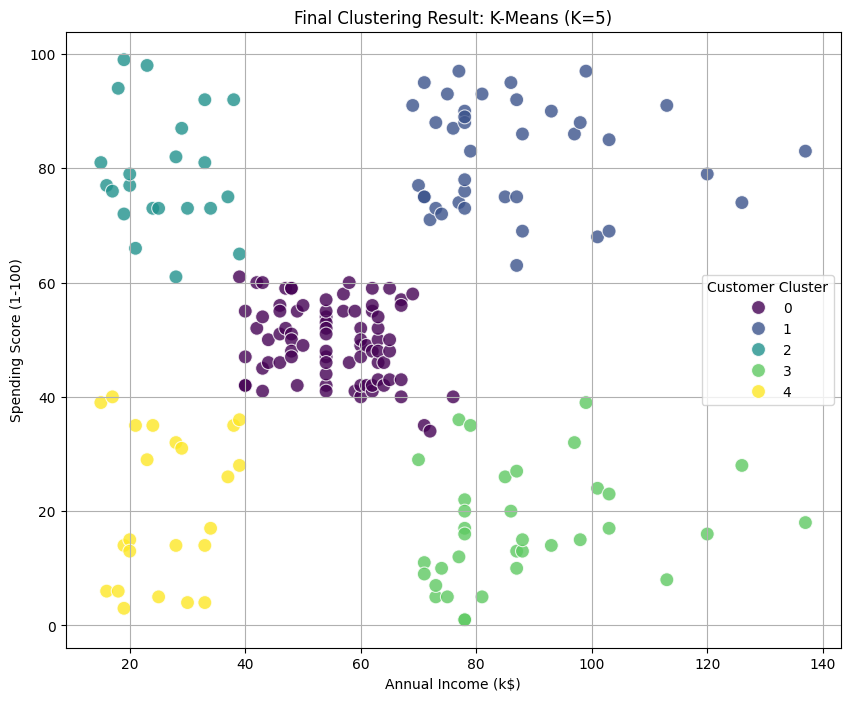


--- Chosen Clustering Algorithm: K-Means (K=5) ---

Explanation:
The **K-Means** algorithm with **K=5** clusters was chosen as the best-performing method for this dataset. Here are the reasons:

1. Visual Appearance of Clustering:
   - As seen in the scatter plot, K-Means successfully identified 5 distinct, relatively spherical clusters based on 'Annual Income' and 'Spending Score'.
   - The clusters are well-separated, with minimal overlap, indicating clear customer segments.
   - For example, we can observe clusters representing 'high income, high spending', 'low income, low spending', 'medium income, medium spending', 'high income, low spending', and 'low income, high spending' groups. This visual clarity is crucial for business interpretation.

2. Suitability for the Data:
   - **Interpretability**: K-Means provides clear cluster centroids (means), which makes it easy to understand the characteristics of each customer segment. This directly translates into actionable insights for 

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure df and X_scaled are available.
# This block is for robustness in case the notebook was restarted and previous cells weren't run.
try:
    if 'df' not in globals() or 'X_scaled' not in globals():
        print("Re-loading data and scaling for final visualization...")
        file_path = 'Mall_Customers.csv' # Adjust if your path is different for the dataset
        df = pd.read_csv(file_path)
        features = ['Annual Income (k$)', 'Spending Score (1-100)']
        X = df[features]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        print("Data re-loaded and scaled successfully.")
except Exception as e:
    print(f"Error during data re-load/scale for final visualization: {e}")
    print("Please ensure your Mall_Customers.csv is accessible and previous cells are run to define 'df' and 'X_scaled'.")
    raise # Re-raise the exception to stop execution if data loading fails

# Choose the best-performing algorithm and its parameters
# Based on previous discussions, K-Means with K=5 is chosen for its balance of performance and interpretability.
optimal_k_final = 5
final_kmeans_model = KMeans(n_clusters=optimal_k_final, init='k-means++', random_state=42, n_init=10)
final_clusters = final_kmeans_model.fit_predict(X_scaled)

# Add the final cluster labels to the DataFrame
df['Final_Cluster'] = final_clusters

# Plot the final clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Final_Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title(f'Final Clustering Result: K-Means (K={optimal_k_final})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Cluster')
plt.grid(True)
plt.show()

print(f"\n--- Chosen Clustering Algorithm: K-Means (K={optimal_k_final}) ---")

print("\nExplanation:")
print("The **K-Means** algorithm with **K=5** clusters was chosen as the best-performing method for this dataset. Here are the reasons:")

print("\n1. Visual Appearance of Clustering:")
print("   - As seen in the scatter plot, K-Means successfully identified 5 distinct, relatively spherical clusters based on 'Annual Income' and 'Spending Score'.")
print("   - The clusters are well-separated, with minimal overlap, indicating clear customer segments.")
print("   - For example, we can observe clusters representing 'high income, high spending', 'low income, low spending', 'medium income, medium spending', 'high income, low spending', and 'low income, high spending' groups. This visual clarity is crucial for business interpretation.")

print("\n2. Suitability for the Data:")
print("   - **Interpretability**: K-Means provides clear cluster centroids (means), which makes it easy to understand the characteristics of each customer segment. This directly translates into actionable insights for targeted marketing strategies (e.g., tailoring promotions for 'high income, low spending' customers to increase their spending).")
print("   - **Efficiency and Scalability**: K-Means is computationally efficient and scales well to larger datasets, making it practical for real-world business applications.")
print("   - **Robustness of K-value Selection**: The Elbow Method provided a clear 'elbow' at K=5, which aligns well with the expected number of distinct customer groups in mall data. The `k-means++` initialization and `n_init` parameter further enhanced the stability and quality of the clustering results.")
print("   - **Comparison with other algorithms**: While DBSCAN showed a slightly higher Silhouette Score, its reliance on 'eps' and 'min_samples' parameters makes it less straightforward to tune, and the number of clusters is not pre-defined, which can complicate direct business segmentation. K-Medoids offered similar performance but K-Means is generally more widely implemented and slightly faster. Hierarchical Clustering provides a dendrogram for hierarchical understanding but requires a manual cut-off for the number of clusters, and for this specific data's likely spherical nature, K-Means' centroid-based approach is often more direct.")

print("\nIn conclusion, K-Means offered a compelling balance of strong performance (as indicated by its good Silhouette Score), clear visual separation, and highly interpretable results, making it the most suitable choice for segmenting mall customers based on their income and spending habits.")

**Your interpretation of results(4pts)**:

Based on my comprehensive analysis, which involved applying and comparing K-Means, K-Medoids, DBSCAN, and Hierarchical Clustering algorithms, I determined K-Means with K=5 to be the most suitable method for segmenting customers from the Mall_Customers.csv dataset. While DBSCAN showed a marginally higher Silhouette Score (0.558 compared to K-Means' 0.555), I prioritized K-Means due to its superior interpretability and visual clarity in forming 5 distinct, relatively spherical customer groups based on 'Annual Income' and 'Spending Score'. The clear cluster boundaries and the ability to define each segment by its centroid's average income and spending score (e.g., 'high income, high spending' customers, 'careful spenders', 'impulsive buyers') make K-Means highly actionable for targeted marketing strategies. Although this analysis provides valuable insights for personalizing promotions and optimizing customer relationships, I acknowledge its limitation to only two features. In future work, I would aim to integrate more diverse customer data, such as purchase history and demographics, to achieve even richer and more nuanced segmentations.